**Caída de una pequeña bola metálica en un fluido viscoso**

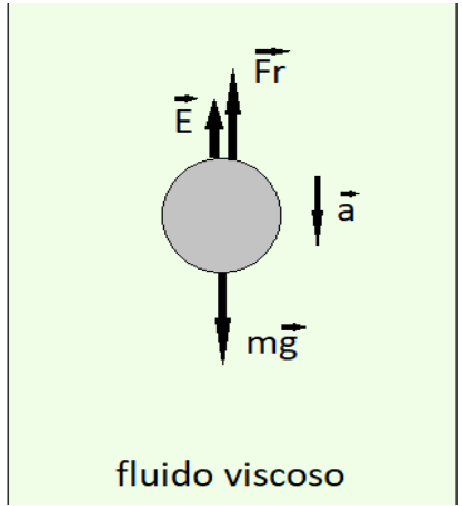

In [84]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [87]:
import numpy as np
import matplotlib.pyplot as grf
from math import*
#CONDICIONES INICIALES
vo = 0.0
to = 0.0
#PUNTO DONDE EVALUAMOS LA SOLUCIÓN
tf = float(input('tn: '))
#NUMERO DE DIVISIONES DEL INTERVALO PARA REALIZAR LA MEJOR APROXIMACIÓN
n = int(input('numero de divisiones: '))
#DEFINICIÓN DE LOS ARREGLOS EN LOS QUE SE ALMACENAN LOS VALORES SUCESIVOS DE X  y Y
v = np.zeros(n+1)
t = np.zeros(n+1)
#consiste en dividir el intervalo que va desde xo a xf en subintervalos de ancho h
# y a este valor h es lo que se conoce como el step size
h = (tf-to)/n 
# formemos el arreglo t
for i in range(n+1):
    t[i] = round(to + i*h,7)
    
#Definir la función dy/dx = f(x,y) 
def f(t,v):
    return 9.0 - 40.0*v

# formemos el arreglo y para determinar la mejor aproximación
v[0] = vo
for i in range(n):
    v[i+1] = v[i] + h*f(t[i],v[i])
    
for i in range(n):
    k1 = h*f(t[i],v[i])
    k2 = h*f(t[i] + h/2,v[i] + k1/2)
    k3 = h*f(t[i] + h/2,v[i] + k2/2)
    k4 = h*f(t[i] + h,v[i] + k3)
    v[i+1] = v[i] + (k1 + 2*k2 +2*k3 + k4)/6.0
    
print("aproximación:",round(v[i+1],5))

tn: 1.5
numero de divisiones: 30
aproximación: 0.225


In [89]:
grf.title('dv/dt = 9 - 40v , v(0) = 0 ')
grf.plot(t,v,"o-",color ='blue',label="aprox")

t = np.linspace(0,5,1000)
grf.plot(t,9*(1 - e**(-40.0*t))/40,color = 'red',label="real")

grf.xlabel("EJE_t")
grf.ylabel("EJE_v(t)");grf.grid(True)

grf.legend(loc="upper left")

grf.ylim(0,0.3)
grf.xlim(0,0.5)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (31,)